# Monitoring Global warming Linear Regression

![image](images/Global-warming.jpg)


## import libraries

In [1]:
import pandas as pd    # Used for csv file import and manipulation

import numpy as np     # Used for creating lists, array manipulation

import seaborn as sns  # Used for visualisations

import matplotlib.pyplot as plt    # Used for visualisations

#for static figures 
%matplotlib inline  

## Load the Datasets and cleaning

[Link to global co2 dataset](http://data.okfn.org/data/core/co2-fossil-global) 

[Link to temperature datasets](http://data.okfn.org/data/core/global-temp)

In [3]:
# co2 dataset

co2_df = pd.read_csv('global_co2.csv')
co2_df.head()

,Year,Total,Gas Fuel,Liquid Fuel,Solid Fuel,Cement,Gas Flaring,Per Capita
0,1751,3,0,0,3,0,0,NaN
1,1752,3,0,0,3,0,0,NaN
2,1753,3,0,0,3,0,0,NaN
3,1754,3,0,0,3,0,0,NaN
4,1755,3,0,0,3,0,0,NaN


In [4]:
# Cleaning the co2 datasts

co2_df = co2_df[co2_df.Year > 1960]      # Keep data in 1960-2010 
co2_df = co2_df.iloc[:,:2]               # Keep only total CO2  
co2_df.columns = ['Year','CO2']          # renaming the column names 
co2_df = co2_df.reset_index(drop=True)   # reset index to 0 
co2_df.head()

,Year,CO2
0,1961,2580
1,1962,2686
2,1963,2833
3,1964,2995
4,1965,3130


In [5]:
# temperature dataset

temp_df = pd.read_csv('annual_temp.csv')
temp_df.head()

,Source,Year,Mean
0,GCAG,2015,0.8990
1,GISTEMP,2015,0.8700
2,GCAG,2014,0.7402
3,GISTEMP,2014,0.7500
4,GCAG,2013,0.6687


In [6]:
# Cleaning temperature data

temp_df = temp_df[temp_df.Source != 'GISTEMP']          # Keeping only one source 'GCAG'
tempdf = temp_df.drop('Source',axis = 1,inplace=True)   # delete Source column 
temp_df = temp_df[temp_df.Year > 1960]                  # Keep data in 1960-2010 
temp_df = temp_df[temp_df.Year < 2011]                  # Keep data in 1960-2010 
temp_df = temp_df.reindex(index=temp_df.index[::-1])    # invert the columns
temp_df.columns = ['Year','Temperature']                # rename column names  
temp_df = temp_df.reset_index(drop=True)                # reset index to 0

temp_df.tail()

,Year,Temperature
45,2006,0.6139
46,2007,0.6113
47,2008,0.5415
48,2009,0.6354
49,2010,0.7008


### concatenating  the datasets

In [7]:
df = pd.concat([co2_df,temp_df.Temperature], axis=1)   # concatinate two datasets to one
df.head()

,Year,CO2,Temperature
0,1961,2580,0.0818
1,1962,2686,0.0924
2,1963,2833,0.1100
3,1964,2995,-0.1461
4,1965,3130,-0.0752


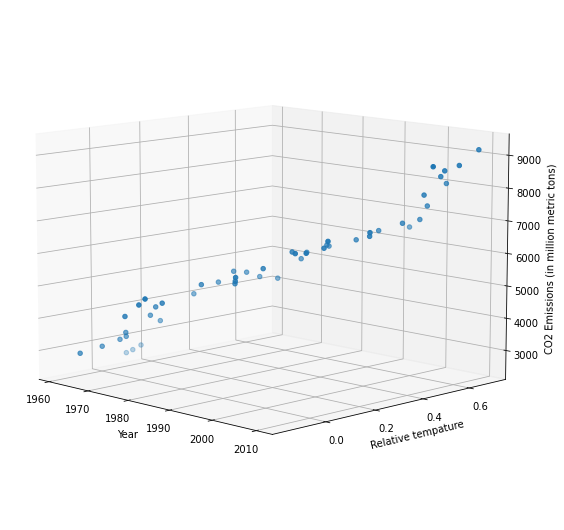

In [8]:
from mpl_toolkits.mplot3d import Axes3D             # matplotlib library for 3d plot 
fig = plt.figure()                                  
fig.set_size_inches(12.5, 9.5)                      # setting figure size
ax = fig.add_subplot(111, projection='3d')
ax.scatter(xs= df['Year'],ys=df['Temperature'],zs = df['CO2']) # scatter plot
ax.set_ylabel('Relative tempature'); ax.set_xlabel('Year'); ax.set_zlabel('CO2 Emissions (in million metric tons)')
ax.view_init(10, -45)     # for setting the appropiate view 

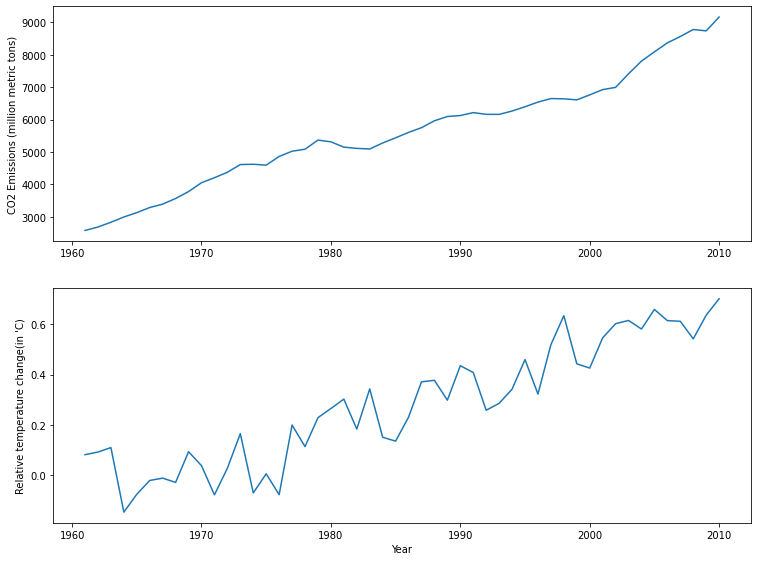

In [9]:
# 2d plots
fig = plt.figure()
fig.set_size_inches(12.5, 9.5)

plt.subplot(2, 1, 1)
plt.plot(df['Year'],df['CO2'])
plt.ylabel('CO2 Emissions (million metric tons)')

plt.subplot(2, 1, 2)
plt.plot(df['Year'],df['Temperature'])
plt.xlabel('Year')
plt.ylabel("Relative temperature change(in 'C)")

plt.show()

## Linear regression

In [10]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [11]:
#X = df.as_matrix(['Year'])                                           # feature as matrix
#y = df.as_matrix(['CO2','Temperature']).astype('float32')            # two labels as matrix 

X_train,X_test,y_train,y_test = train_test_split(df['Year'].values.reshape(-1, 1),df[['CO2','Temperature']].values,test_size= 0.1)   # split the dataset with 10% test data 


In [12]:
reg = LinearRegression()                  # start the clasifier
reg.fit(X_train,y_train)                  # fit the model

LinearRegression()

In [13]:
print('Score :' ,reg.score(X_test.reshape(-1,1),y_test))    # Accuracy score on test data

Score : 0.8971031684217732


In [14]:
x_line = np.arange(1960,2050).reshape(-1,1)                 # lining Year upto 2050
p = reg.predict(x_line).T                                   # predict the labels 

## 3d Plots

ValueError: operands could not be broadcast together with remapped shapes [original->remapped]: (90,)  and requested shape (90,1)

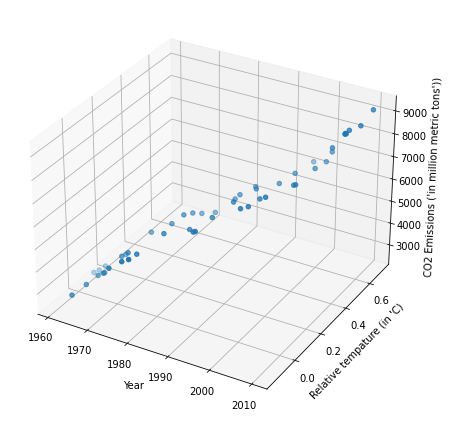

In [15]:
fig2 = plt.figure()
fig2.set_size_inches(12.5, 7.5)
ax = fig2.add_subplot(111, projection='3d')
ax.scatter(xs=df['Year'], ys=df['Temperature'], zs=df['CO2'])
ax.set_ylabel("Relative tempature (in 'C)"); ax.set_xlabel('Year'); ax.set_zlabel("CO2 Emissions ('in million metric tons'))")
ax.plot(xs=x_line, ys=p[1], zs=p[0], color='green')        # predicted line 
ax.view_init(10, -45)

## projected 2d plot

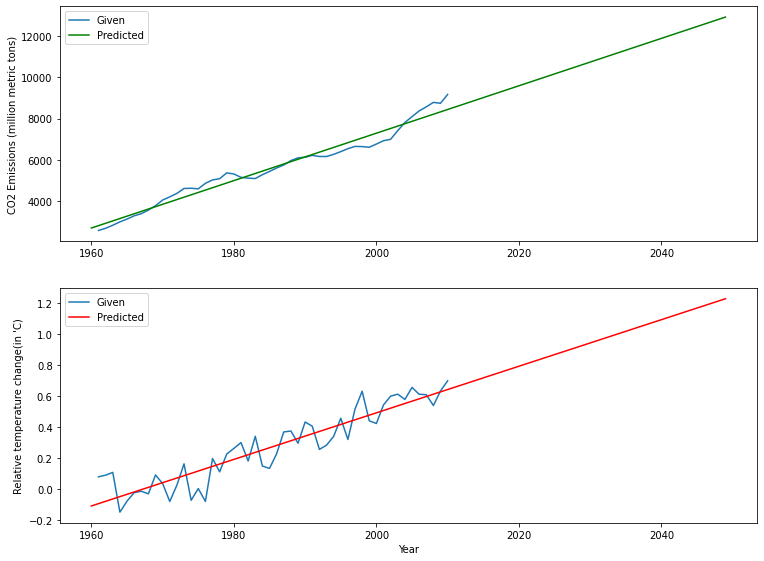

In [17]:
# 2d plots
fig = plt.figure()
fig.set_size_inches(12.5, 9.5)

plt.subplot(2, 1, 1)
plt.plot(df['Year'],df['CO2'],label='Given')
plt.plot(x_line,p[0], color='green',label='Predicted')
plt.ylabel('CO2 Emissions (million metric tons)')
plt.legend()


plt.subplot(2, 1, 2)
plt.plot(df['Year'],df['Temperature'],label='Given')
plt.plot(x_line,p[1], color='red',label='Predicted')
plt.xlabel('Year')
plt.ylabel("Relative temperature change(in 'C)")
plt.legend()

plt.show()

# Don’t make our earth garbage; save it from global warming.